<a href="https://colab.research.google.com/github/Anay21110/GenderDisparity-in-hollywood/blob/main/analyzing_gender_disparity_in_hollywood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Bechdel Test: Analyzing gender disparity in Hollywood**

Using data analytic techniques to visualize gender inequality in Hollywood

The Bechdel test is named after cartoonist Alison Bechdel, who introduced the idea in a comic strip in the year 1985. To pass the test, a story needs to have:
* At least two women
* The women need to talk to each other
* They need to talk to each other about something other than a man

# **The Data Question**

My aim was to collect data from various different sources, and answer the following questions about the Bechdel test:

* Have the Bechdel scores of movies improved over the years?
* Do movies with higher IMDB ratings have higher Bechdel scores?
* Do movies with female directors have higher Bechdel scores?
* Does the budget of a movie have any impact on its Bechdel score?
* Do movies with higher Bechdel scores generate a larger revenue?

# **Data analysis**

*I will use python to perform data analysis and visualization.*


*First, I used data from bechdeltest.com, which was pretty easy to grab because of their API.*

In [ ]:
# imports
import urllib,json
import pandas as pd

df = pd.read_json('http://bechdeltest.com/api/v1/getAllMovies')

Now, I will take a look at the head of the data frame:


In [ ]:
df.head()

,id,imdbid,title,rating,year
0,9602,3155794,Passage de Venus,0,1874
1,9804,14495706,La Rosace Magique,0,1877
2,9806,12592084,Le singe musicien,0,1878
3,9603,2221420,Sallie Gardner at a Gallop,0,1878
4,9816,7816420,Athlete Swinging a Pick,0,1881


*There are five variables in the data frame:
*
* rating: Bechdel Score of the movie from 0 to 3. A Bechdel score lower than 3 means the movie failed the Bechdel test, and a Bechdel score of 3 means the movie passed.
* imdbid: The movie’s IMDB number
* title: Movie title
* id: Unique movie ID
* year: Year the movie was released

*Taking a look at the column ‘year’, you can see that there are movies present from the 19th century, and a lot of those movies have a Bechdel score of 0.
I am going to create a new data frame with movies released after the year 1967, and will be using this new data frame for the rest of my analysis.*

In [ ]:
dfNew = df[df['year'] >= 1967]

In [ ]:
dfNew.head()

,id,imdbid,title,rating,year
1203,4722,0062990,"Fox, The",3,1967
1204,2054,0063278,Marketa Lazarova,1,1967
1205,6714,0062411,Uchu daikaiju Girara,3,1967
1206,301,0061512,Cool Hand Luke,1,1967
1207,2664,0061452,Casino Royale,2,1967


**I am now going to rename the column ‘rating’ to ‘Bechdel Score’, to make things clearer for the rest of the analysis.**

In [ ]:
dfNew.rename(columns={'rating':'Bechdel Score'}, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4446: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


**Now, I am going to convert the ‘year’ column into a datetime object.**

In [ ]:
dfNew['year'] = pd.to_datetime(dfNew['year'], format='%Y')


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**Next, I will change the Bechdel Scores to categorical variables.**


In [ ]:
dfNew['Bechdel Score'] = dfNew['Bechdel Score'].astype('category',copy=False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Finally, the data is prepared and can be used to do some data visualization.


I will first create a count plot using Seaborn, to visualize the Bechdel scores.

In [ ]:
import seaborn as sns

<AxesSubplot:xlabel='Bechdel Score', ylabel='count'>

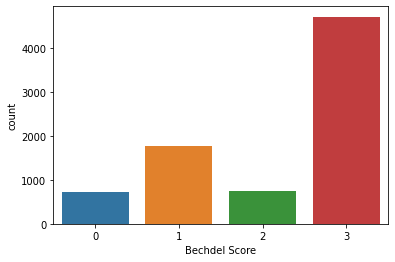

In [ ]:
sns.countplot(x='Bechdel Score',data=dfNew)


**Most movies after the year 1967 seem to have higher Bechdel scores, but do they pass the Bechdel test?**


In [ ]:
li = []
for i in dfNew['Bechdel Score']:
    if(i<3):
        li.append(0)
    else:
        li.append(1)
dfNew['pass_test'] = li
dfNew

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,id,imdbid,title,Bechdel Score,year,pass_test
1203,4722,0062990,"Fox, The",3,1967-01-01,1
1204,2054,0063278,Marketa Lazarova,1,1967-01-01,0
1205,6714,0062411,Uchu daikaiju Girara,3,1967-01-01,1
1206,301,0061512,Cool Hand Luke,1,1967-01-01,0
1207,2664,0061452,Casino Royale,2,1967-01-01,0
...,...,...,...,...,...,...
9164,9830,0499097,Without Remorse,1,2021-01-01,0
9165,9500,9286908,High Ground,2,2021-01-01,0
9166,9599,8521718,"United States vs. Billie Holiday, The",3,2021-01-01,1
9167,9635,10121392,Thunder Force,3,2021-01-01,1


**Now, there is a dataframe called pass test, with a value of 1 for all the movies that pass the Bechdel test, and a value of 0 for the movies that don’t.**

*I will visualize this using Seaborn.*


<AxesSubplot:xlabel='pass_test', ylabel='count'>

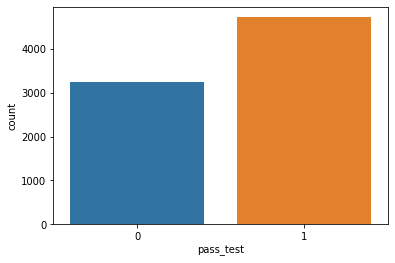

In [ ]:
sns.countplot(x='pass_test',data=dfNew)


**There are more movies that have passed the Bechdel test as opposed to the ones that haven’t, since the year 1967.**

**However, this difference is not as significant as I expected it to be. There still seems to be a very large number of movies that didn’t pass the test.**

**Now, I will take a look at how the Bechdel scores changes with time.**

**Has there been an improvement in the representation of women in the film industry? Are things still the same? Did they get worse?**

**To do this, I will use the Plotnine library.**

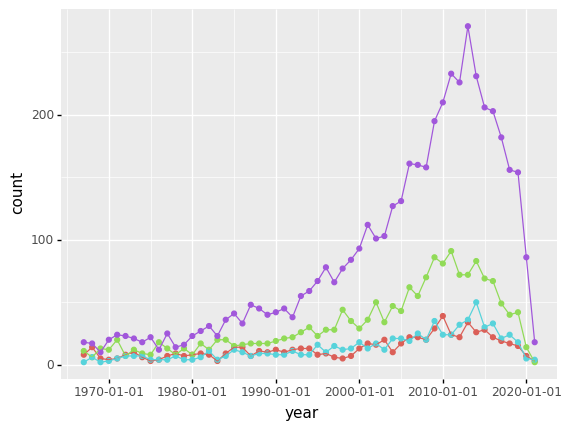

<ggplot: (8748768761577)>

In [ ]:
from plotnine import *
(ggplot(dfNew)+geom_point(aes('year',color=dfNew['Bechdel Score']),stat='count',show_legend=False)+geom_line(aes('year',color=dfNew['Bechdel Score']),stat='count',show_legend=False))

**In the 1970s and 1980s, there were a few movies that passed the Bechdel test. During this time, there was no significant difference between movies that passed the test and movies that didn’t.**

**The years following the 1980s and 1990s saw a spike in the number of movies that passed the Bechdel test, and there is massive improvement going into the 21st century.**

**Now, I want to visualize the relationship between IMDB rating and the Bechdel scores. Are movies with higher Bechdel scores more likely to have higher IMDB ratings, or is it the other way round?**

**To do so, I will use a different dataset called movies.csv, and merge it with my existing data frame.**

In [ ]:
imdb = pd.read_csv('../input/movies-fordatavisualization/movies.csv.txt')
imdbNew = imdb[['title','rating']]
dfNew = pd.merge(dfNew, imdbNew, how='left', left_on=['title'], right_on=['title'])
dfNew.head()

,id,imdbid,title,Bechdel Score,year,pass_test,rating
0,4722,0062990,"Fox, The",3,1967-01-01,1,6.4
1,2054,0063278,Marketa Lazarova,1,1967-01-01,0,NaN
2,6714,0062411,Uchu daikaiju Girara,3,1967-01-01,1,NaN
3,301,0061512,Cool Hand Luke,1,1967-01-01,0,8.2
4,2664,0061452,Casino Royale,2,1967-01-01,0,5.3


**The ‘rating’ column in the dataframe represents the IMBD movie ratings. This column has a few null values, and these rows will be dropped.**

**I will then create a new data frame with only the year, Bechdel score, and IMDB rating, so I can visualize the relationship between the three.**

In [ ]:
# Dropping rows with null values:
dfNew = dfNew.dropna()
dfNew = dfNew.drop('id',axis=1)
# Creating a new dataframe with only year, Bechdel scores, and imdb rating:
new = dfNew.groupby(['year','Bechdel Score']).agg({'rating':'mean'}).reset_index()
new.head()

,year,Bechdel Score,rating
0,1967-01-01,0,7.700000
1,1967-01-01,1,7.125000
2,1967-01-01,2,6.750000
3,1967-01-01,3,6.658333
4,1968-01-01,0,7.262500


*I will visualize this relationship:*

/opt/conda/lib/python3.7/site-packages/plotnine/stats/smoothers.py:311: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/opt/conda/lib/python3.7/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


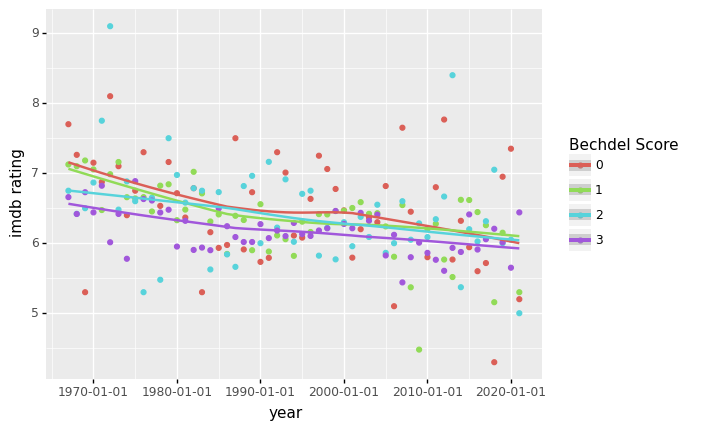

<ggplot: (8748719575389)>

In [ ]:
# Plot year against IMDB rating and Bechdel Score:
ggplot(new,aes(x='year',y='rating',color='Bechdel Score'))+ geom_point()+geom_smooth()+scale_y_continuous(name="imdb rating")+labs( colour='Bechdel Score' )

# **It appears as though movies that pass the Bechdel test have significantly lower IMDB ratings compared to movies that don’t, which was pretty surprising to me.**


**And that’s it! I managed to visualize relationships and answer all the data questions I set out to find answers to.**


Some interesting data findings include:
* Movies that fail the Bechdel test tend to have higher IMDB ratings.
* Over the years, there has been an increasing number of movies that pass the Bechdel test.


**Of course, this analysis was only done with the data I gathered from three places, and might not represent the entire population of movies out there.**

**Furthermore, there may have been other variables present that affected the outcome of this analysis, and it might be a good idea to experiment with data from a couple of other places before coming to a conclusion.**

**Finally, I would like to mention that the Bechdel test is not necessarily the best benchmark to measure female representation in movies. It does not take into consideration how well written a female character is, neither does it measure meaningful depth of character.**

**However, it is one of the most well-known metrics used to expose gender bias and is the only test we have this kind of data on.**